In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\orenk\Desktop\Aim2_Resources/intact_perplexity_ordinal_regression_1652622160.537304.csv", index_col=False)
df

,ii,cond,roi,loo_subj,fs_method,ord_method,fit_method,mse,acc
0,0,intact,reward,23,PCA(n_components=15),ordered_classes,RandomForestClassifier(n_estimators=50),643.772727,0.060606
1,0,intact,reward,23,PCA(n_components=15),ordered_classes,RandomForestClassifier(),983.181818,0.015152
2,0,intact,reward,23,PCA(n_components=15),ordered_classes,RandomForestClassifier(n_estimators=200),952.575758,0.015152
3,0,intact,reward,23,PCA(n_components=15),ordered_classes,KNeighborsClassifier(n_neighbors=6),546.454545,0.030303
4,0,intact,reward,23,PCA(n_components=15),ordered_classes,KNeighborsClassifier(n_neighbors=12),1179.939394,0.015152
...,...,...,...,...,...,...,...,...,...
8419,647,scrambled,vision,131,PCA(n_components=128),ordered_classes,"SVC(kernel='poly', probability=True)",696.863636,0.015152
8420,647,scrambled,vision,131,PCA(n_components=128),ordered_classes,"LogisticRegression(max_iter=1000, penalty='l1'...",994.136364,0.015152
8421,647,scrambled,vision,131,PCA(n_components=128),ordered_classes,LogisticRegression(max_iter=1000),1261.287879,0.000000
8422,647,scrambled,vision,131,PCA(n_components=128),ordered_classes,"LogisticRegression(C=0.2, max_iter=1000)",1209.651515,0.000000


In [3]:

from shared_analysis_utils import strip_est, strip_fs

df["fit_method"] = strip_est(df["fit_method"])
df["fs_method"] = strip_fs(df["fs_method"])


======= PCA(15) reward =======


<Figure size 500x500 with 0 Axes>

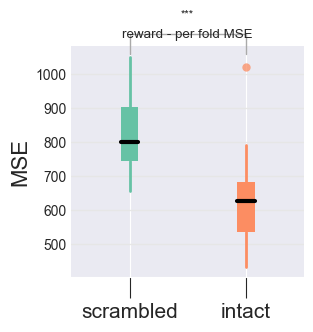

For reward, PCA(15):
roi : wilcoxon: z = 13.0 , p = 0.00067138671875 
Total 18 random vec, rank of actual (625.0563973063972) is 0.0 (0/18)
======= PCA(15) vision =======


<Figure size 500x500 with 0 Axes>

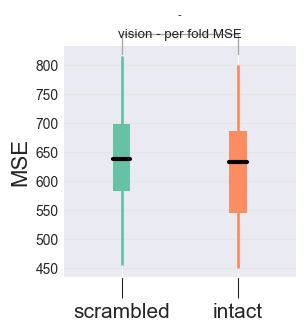

For vision, PCA(15):
roi : wilcoxon: z = 82.0 , p = 0.8985748291015625 
Total 18 random vec, rank of actual (619.0025252525252) is 0.4444444444444444 (8/18)


In [4]:
from shared_analysis_utils import draw_stars_box
for (fs, roi), df_chosen_roi in df[(df.fit_method == "SVC('poly')") & (df.fs_method == "PCA(15)")].groupby(["fs_method","roi"]):
    if 1==1:
        print("=======", fs, roi , "=======")
        plt.figure(figsize=(5,5))
        null_dist = df_chosen_roi[df_chosen_roi.cond=='scrambled'].mse
        actual_dist = df_chosen_roi[df_chosen_roi.cond=='intact'].mse
        actual_error = actual_dist.mean()


        s = draw_stars_box(
                        df_chosen_roi[df_chosen_roi.cond=='scrambled'].mse,
                        df_chosen_roi[df_chosen_roi.cond=='intact'].mse,
                        "wilcoxon", "roi",  reverse_labels=True, verbose=False, ylabel = "MSE",
                        xlabels = ['intact','scrambled'], title = f"{roi} - per fold MSE"
        )
        print(f"For {roi}, {fs}:")
        print(s[0])
        actual_rank = [x for x in null_dist if x < actual_error]
        print(f"Total {len(null_dist)} random vec, rank of actual ({actual_error}) is {len(actual_rank)/len(null_dist)} ({len(actual_rank)}/{len(null_dist)})")
        print("=======")